# ESTRUCTURAS I - CURSO 2023-2024
***Universidad de Granada***

---





**PRÁCTICA 1:**

Determinar los diagramas de esfuerzos de la siguiente estructura.

<img src="https://github.com/EnriqueGarMac/Estructuras_I/blob/main/Ejemplos/Imagenes/Practica_I.jpg?raw=true" width="600">



In [11]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I_II.git

  Cloning https://github.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-3izcel4t
  Running command git clone --filter=blob:none --quiet https://github.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-3izcel4t
  Resolved https://github.com/EnriqueGarMac/Estructuras_I_II.git to commit b956e909912a273d0413035c94e551791a45a353
  Preparing metadata (setup.py) ... done


In [18]:
# Cargamos el software anastruct
from anastruct import SystemElements
import collections
collections.Iterable = collections.abc.Iterable

# Cargamos el objeto de nuestra estructura
ss = SystemElements()

In [19]:
# Definición de variables
L1 = 2.0;  # m
L2 = 6.0; # m
q = 15; # Carga triangular kN/m
P = 40; # Carga puntual kN
Mp = 20; # Momento puntual kNm

# Construcción de la estructura
# Añadimos elemento barra 1
ss.add_element(location=[[0, 0], [L1,0]]);
# Añadimos elemento barra 2
ss.add_element(location=[[L1, 0], [L1+L2,0]]);

In [20]:
# Condiciones de contorno

# Añadimos carrito al nodo 2
ss.add_support_roll(node_id=2, direction=2)

# Añadimos apoyo fijo al nodo 3
ss.add_support_hinged(node_id=3)


In [21]:
# Cargas

# Añadimos carga puntual al nodo 1
ss.point_load(1, Fx=0, Fy=-P)

# Añadimos momento puntual al nodo 1
ss.moment_load(1, Ty=Mp)

# Añadimos carga triangular
ss.q_load(element_id=1, q=(0,L1*q/(L1+L2)), q_perp=(0,0))
ss.q_load(element_id=2, q=(L1*q/(L1+L2),q), q_perp=(0,0))


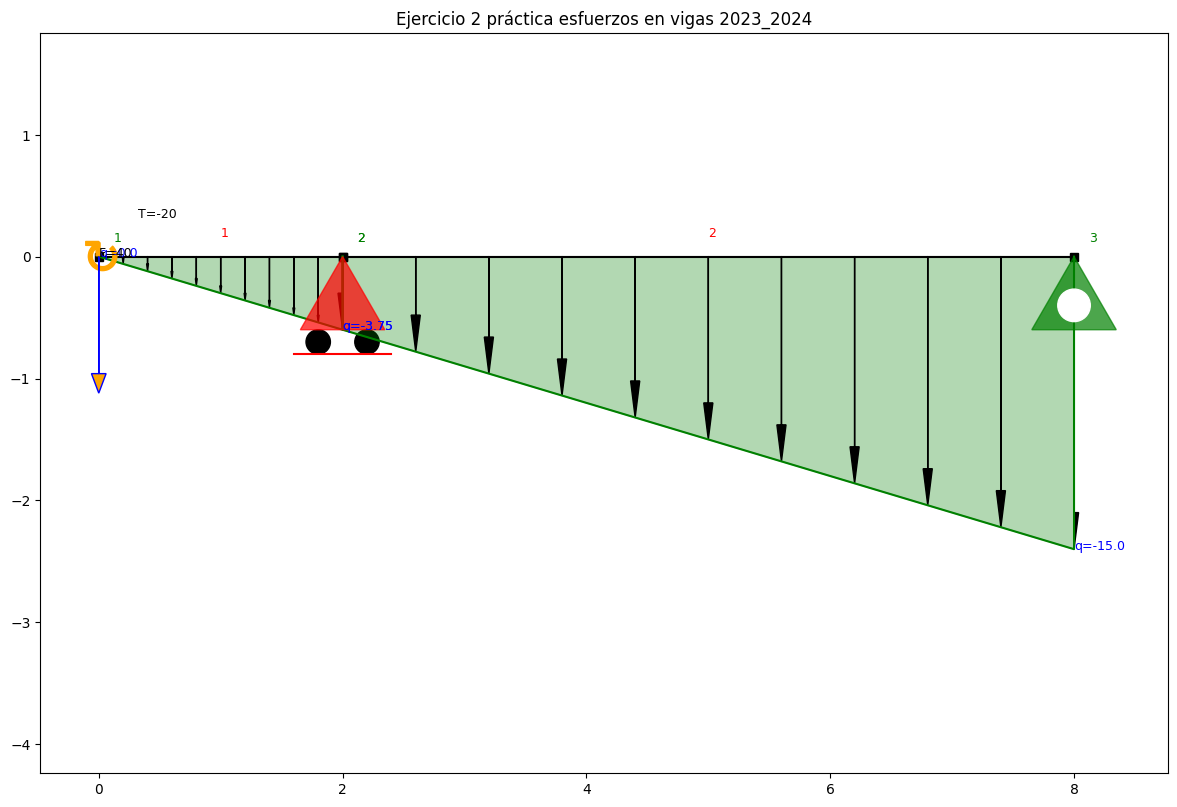

In [22]:
# Mostramos estructura generada
ss.show_structure(title='Ejercicio 1 práctica esfuerzos en vigas 2023_2024')


In [23]:
# Resolvemos la estructura
ss.solve();

 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -6.53144959545255e-19   -0.031333348333327855
2  ->  -6.429395695523604e-19   0.0
3  ->  -0.0   0.0


Reacciones
***************************
*Nodo:  3
Reacción Fy:  23.3333
*Nodo:  2
Reacción Fy:  76.6667


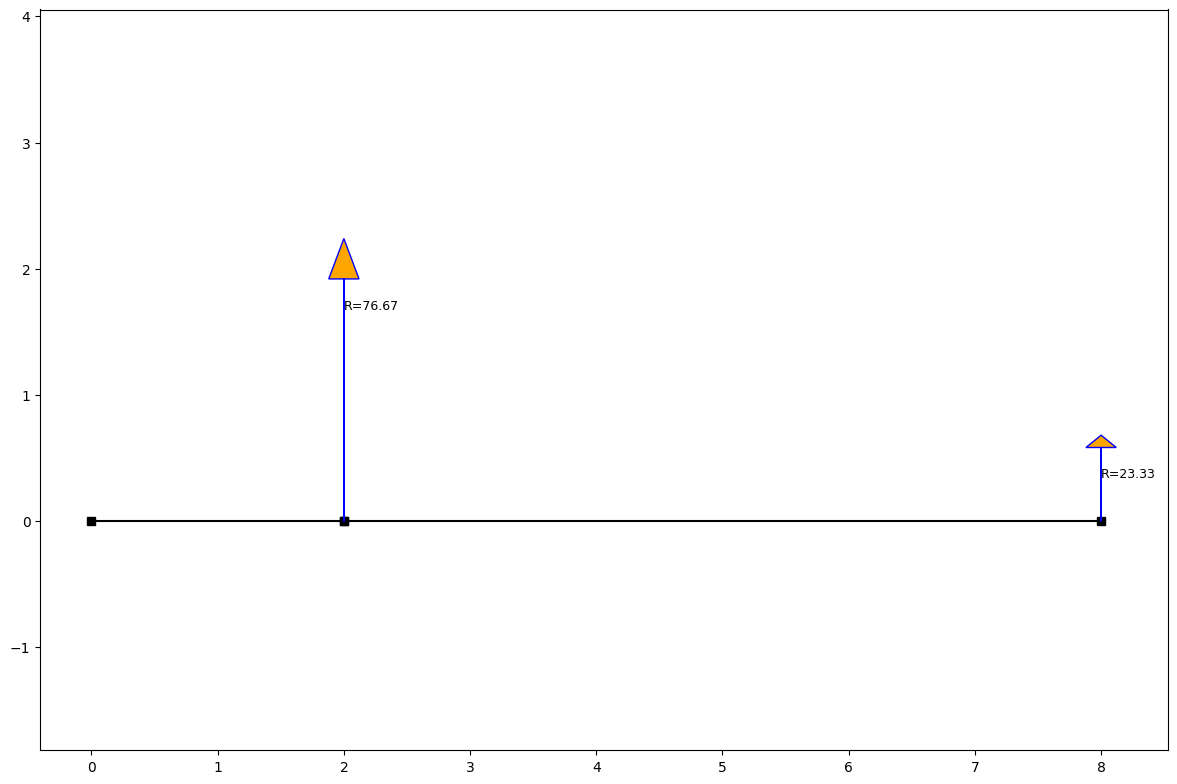

-------------------------------------------


In [24]:
# Mostramos las reacciones
ss.show_reaction_force()

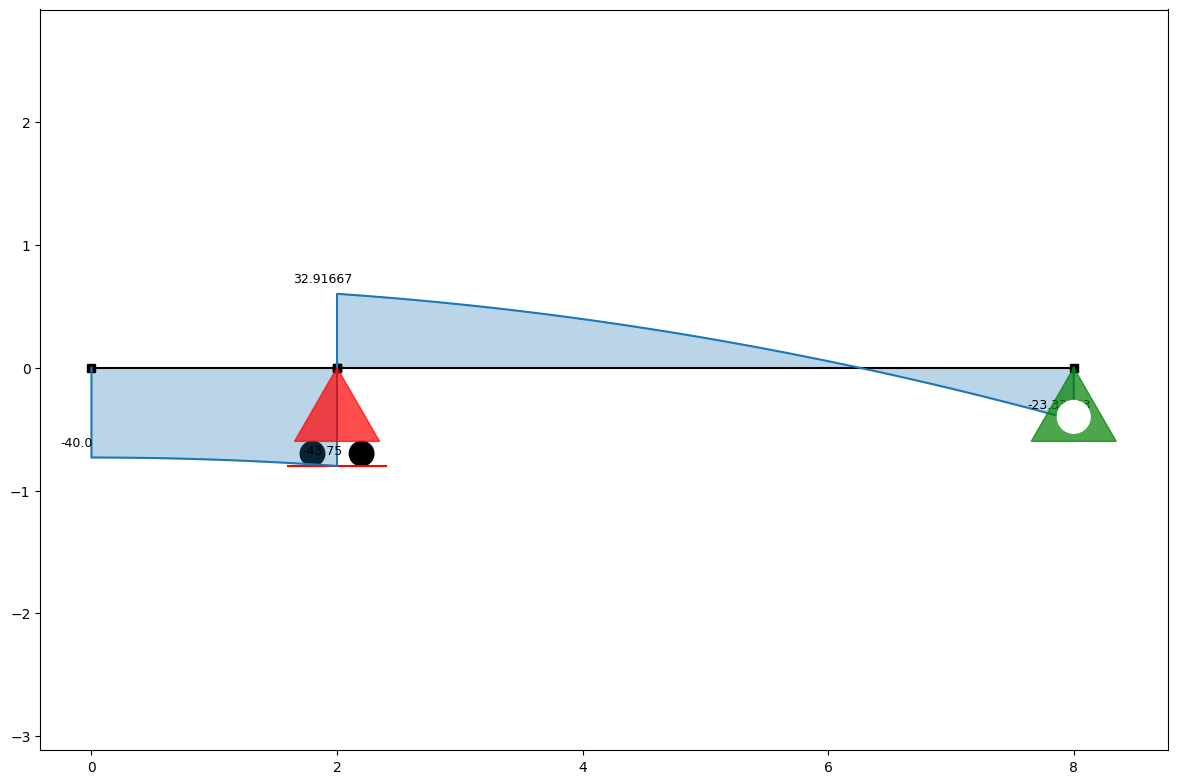

In [25]:
# Mostramos cortantes
ss.show_shear_force()

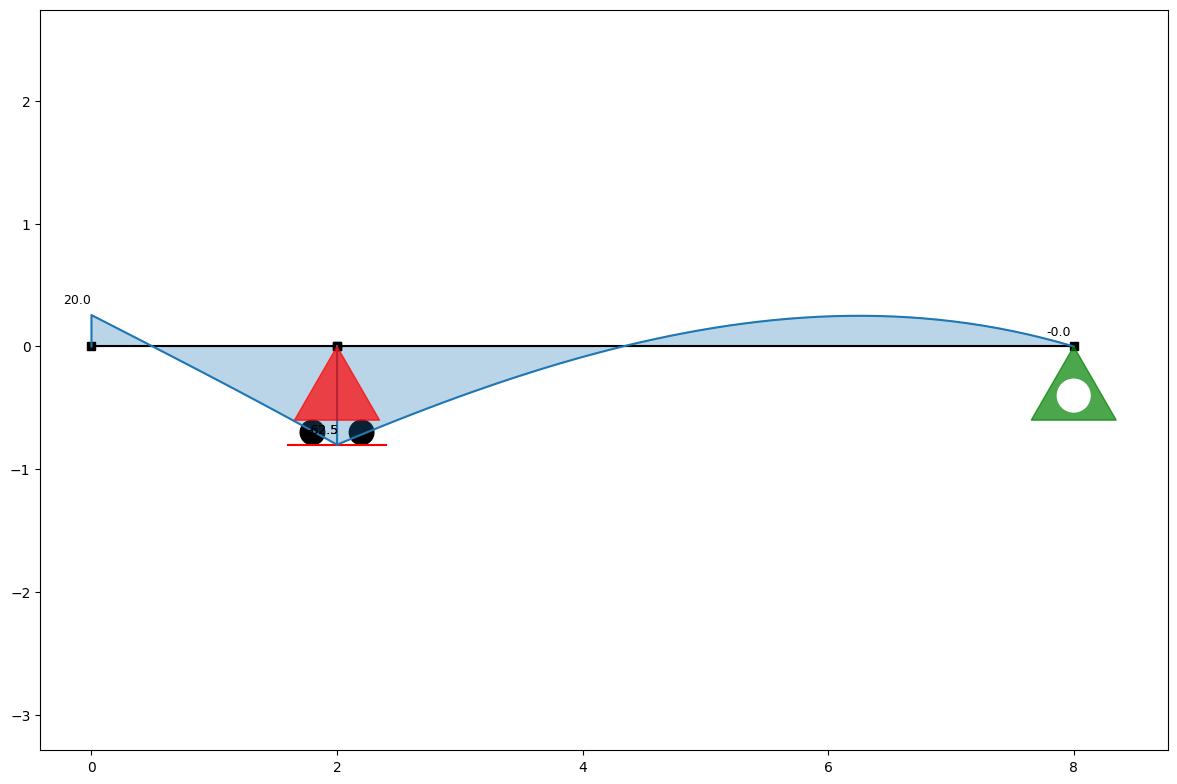

In [26]:
# Mostramos flectores
ss.show_bending_moment()

Maximum deflection: 0.0313; Position: (x,y) = (0.0,0.0)
Maximum deflection: 0.0058; Position: (x,y) = (6.163,0.0)


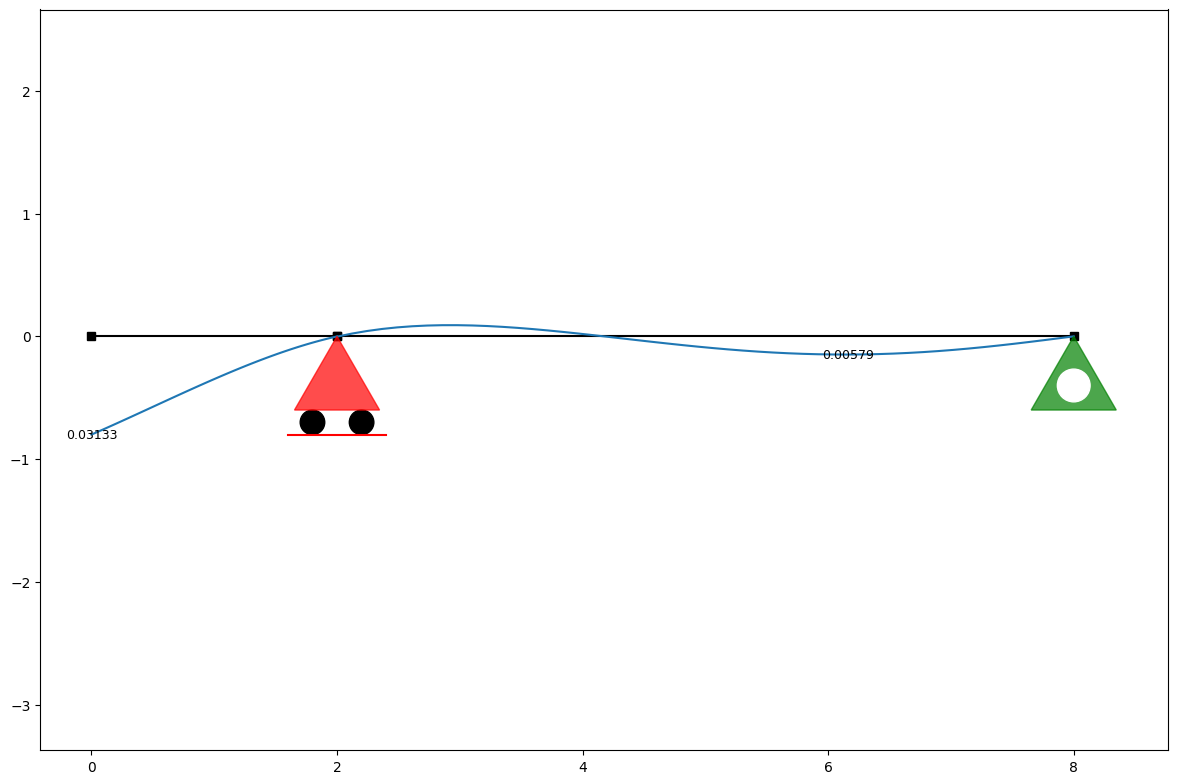

In [27]:
# Mostramos deformada
ss.show_displacement()